In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from random import sample 

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data.csv')
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,168592.000000,168592.000000,1.685920e+05,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000,168592.000000
mean,0.501360,0.533648,2.327016e+05,0.488577,0.071516,0.169476,5.196795,0.205151,-11.358180,0.709446,31.626862,0.083616,116.918295,0.528497,1977.457774
std,0.377993,0.175919,1.223921e+05,0.267346,0.257685,0.315383,3.504587,0.175896,5.670176,0.454019,21.393260,0.119917,30.726527,0.264457,25.406757
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.097800,0.412000,1.721600e+05,0.265000,0.000000,0.000000,2.000000,0.098200,-14.388000,0.000000,13.000000,0.034800,93.500750,0.315000,1957.000000
50%,0.515000,0.543000,2.091330e+05,0.480000,0.000000,0.000264,5.000000,0.134000,-10.466000,1.000000,34.000000,0.044600,114.795000,0.539000,1978.000000
75%,0.896000,0.662000,2.637070e+05,0.709000,0.000000,0.111000,8.000000,0.259000,-7.135000,1.000000,48.000000,0.072300,135.733500,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.968000,244.091000,1.000000,2020.000000



## Primary:
- id (Id of track generated by Spotify)
## Numerical:
- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)
## Dummy:
- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)
## Categorical:
- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- artists (List of artists mentioned)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [6]:
df.head()
print(df.shape)

(168592, 19)


In [7]:
'[knmk]'.strip('[]')

'knmk'

In [8]:
def cleanup(x):
    return x.strip("[]''")
df['artists'] =df['artists'].apply(cleanup)

In [9]:
df.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.262832,-0.085879,-0.767022,-0.247950,0.339923,-0.022409,-0.024904,-0.585457,0.043947,-0.607992,-0.026417,-0.210797,-0.187451,-0.642732
danceability,-0.262832,1.000000,-0.128299,0.238806,0.218975,-0.283096,0.023611,-0.109332,0.317951,-0.042312,0.229609,0.210952,0.003052,0.565021,0.214770
duration_ms,-0.085879,-0.128299,1.000000,0.022898,-0.006216,0.078177,-0.003633,0.037298,-0.031605,-0.049531,0.049449,0.002157,-0.031583,-0.200535,0.061236
energy,-0.767022,0.238806,0.022898,1.000000,0.200190,-0.303146,0.029998,0.138090,0.779194,-0.039160,0.480175,0.036137,0.253422,0.361052,0.516668
explicit,-0.247950,0.218975,-0.006216,0.200190,1.000000,-0.127075,0.011627,0.021441,0.219321,-0.081413,0.288192,0.268731,0.021392,-0.030064,0.324760
instrumentalness,0.339923,-0.283096,0.078177,-0.303146,-0.127075,1.000000,-0.014939,-0.047391,-0.439705,-0.038368,-0.306500,-0.103092,-0.113880,-0.199019,-0.298391
key,-0.022409,0.023611,-0.003633,0.029998,0.011627,-0.014939,1.000000,-0.001849,0.020822,-0.105546,0.009464,0.022766,0.002141,0.028011,0.011660
liveness,-0.024904,-0.109332,0.037298,0.138090,0.021441,-0.047391,-0.001849,1.000000,0.065164,0.007891,-0.067320,0.140733,0.009859,0.001406,-0.046680
loudness,-0.585457,0.317951,-0.031605,0.779194,0.219321,-0.439705,0.020822,0.065164,1.000000,-0.013494,0.440732,-0.021187,0.214425,0.322729,0.465198
mode,0.043947,-0.042312,-0.049531,-0.039160,-0.081413,-0.038368,-0.105546,0.007891,-0.013494,1.000000,-0.033443,-0.057941,0.014750,0.016857,-0.035524


Text(0.5, 0, 'Year')

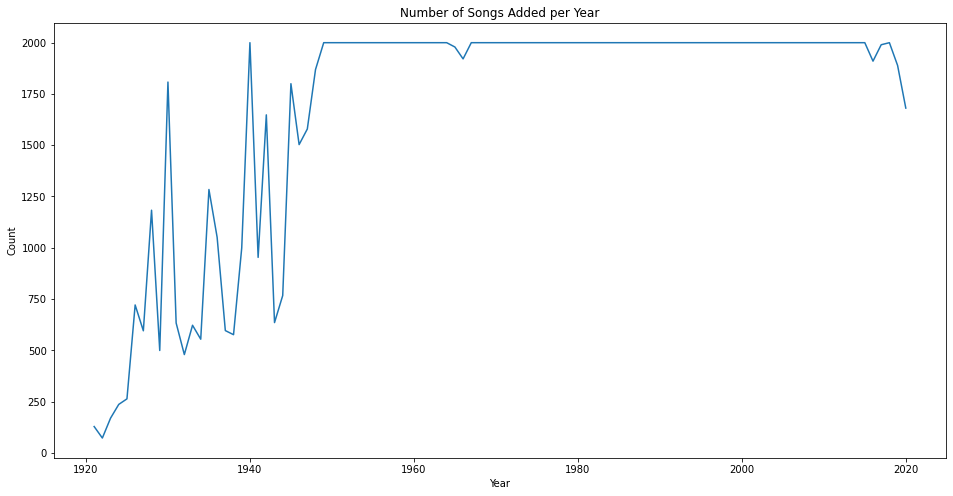

In [10]:
plt.figure(figsize=(16, 8))
x = df.groupby("year")["energy"].count()
ax = sns.lineplot(x.index,x)
ax.set_title('Number of Songs Added per Year')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

(0.0, 1.0)

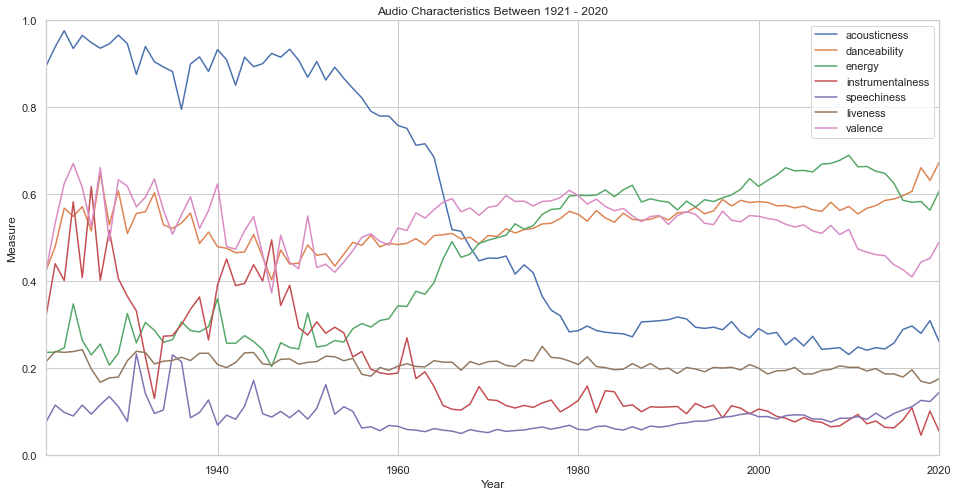

In [11]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy", "instrumentalness", "speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio Characteristics Between 1921 - 2020')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')
ax.set_xlim([1921,2020])
ax.set_ylim([0,1])

(0.0, 100.0)

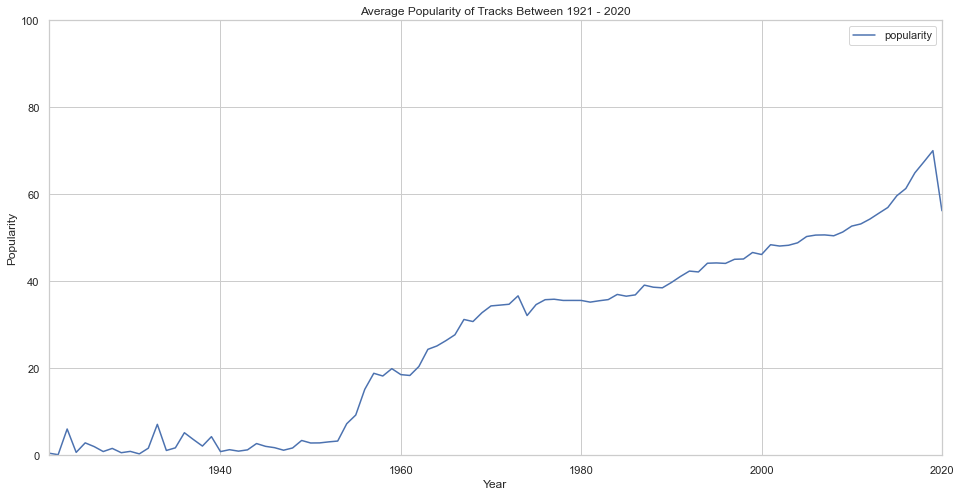

In [12]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Average Popularity of Tracks Between 1921 - 2020')
ax.set_ylabel('Popularity')
ax.set_xlabel('Year')
ax.set_xlim([1921,2020])
ax.set_ylim([0,100])

In [13]:
popular = df[df['popularity']>80]
popular

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
4772,0.03390,The Beatles,0.557,185733,0.540,0,6dGnYIeXmHdcikdzNNDMm2,0.002480,9,0.1790,-10.484,1,Here Comes The Sun - Remastered 2009,83,1969-09-26,0.0347,129.171,0.394,1969
5072,0.43200,Elton John,0.601,281613,0.532,0,3gdewACMIVMEWVbyb8O9sY,0.000006,10,0.0925,-9.119,1,"Rocket Man (I Think It's Going To Be A Long, L...",81,1972-05-19,0.0286,136.571,0.341,1972
5272,0.18100,Lynyrd Skynyrd,0.596,283800,0.605,0,7e89621JPkKaeDSTQ3avtg,0.000331,7,0.0863,-12.145,1,Sweet Home Alabama,82,1974-04-15,0.0255,97.798,0.886,1974
5472,0.00574,Eagles,0.579,391376,0.508,0,40riOy7x9W7GXjyGp4pjAv,0.000494,2,0.0575,-9.484,1,Hotel California - 2013 Remaster,82,1976-12-08,0.0270,147.125,0.609,1976
5772,0.05910,AC/DC,0.573,208400,0.913,0,2zYzyRzz6pRmhPzyfMEC8s,0.001730,6,0.1560,-4.793,0,Highway to Hell,83,1979-07-27,0.1320,115.715,0.422,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138637,0.40600,"Nea', 'Felix Jaehn",0.682,186878,0.700,0,7C1trmcQQ5n5RNy4l6ziCv,0.000000,6,0.1740,-5.591,1,Some Say - Felix Jaehn Remix,82,2020-01-10,0.0397,120.030,0.637,2020
146119,0.01490,"Riton', 'Oliver Heldens', 'Vula",0.737,208474,0.828,0,0qaWEvPkts34WF68r8Dzx9,0.000583,11,0.0862,-4.711,1,Turn Me On (feat. Vula),82,2019-09-13,0.0396,124.052,0.517,2019
153843,0.15200,"Camilo', 'Evaluna Montaner",0.716,183547,0.588,0,0gWbAFRcUyZKdfUxEOuOiD,0.000000,1,0.0847,-3.952,1,Por Primera Vez,82,2020-03-09,0.1160,165.896,0.707,2020
161119,0.15800,Beéle,0.820,204000,0.565,0,2J9B63FawlTaPdg4eH5X03,0.000024,6,0.0469,-5.965,1,Loco,82,2019-08-08,0.1700,105.110,0.773,2019


Text(0.5, 0, 'Year')

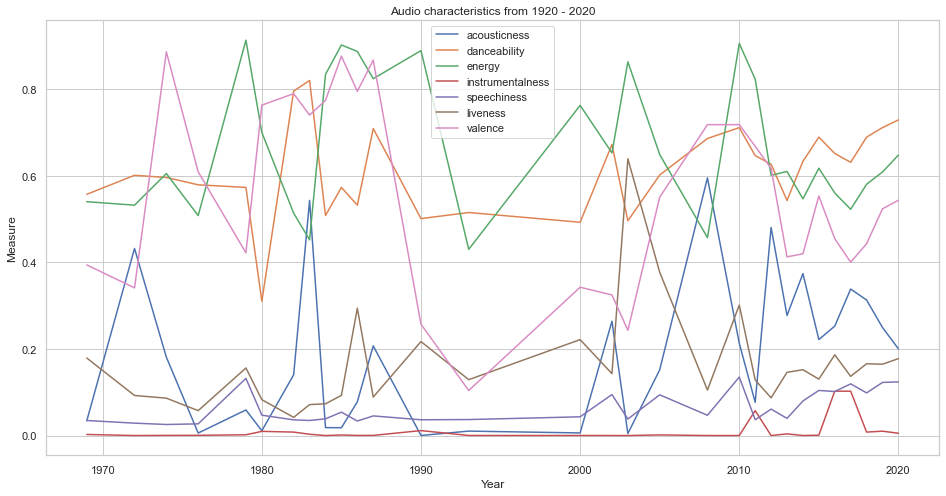

In [14]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy", "instrumentalness", "speechiness","liveness","valence"]
for col in columns:
    x = popular.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics from 1920 - 2020')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

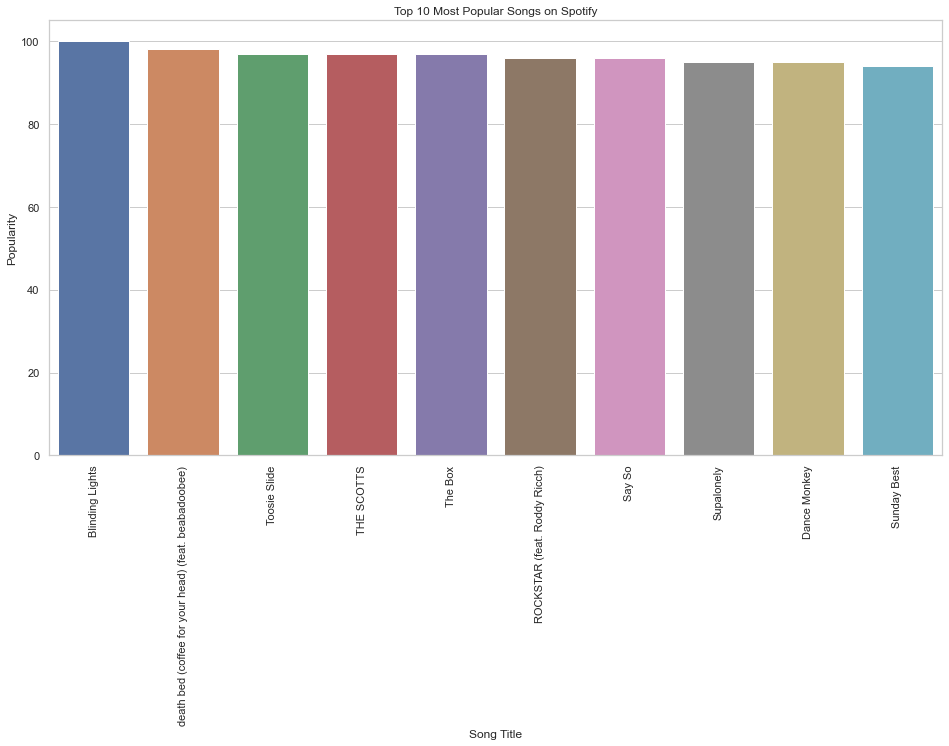

In [15]:
top10 = df.groupby('name')['popularity'].max().sort_values(ascending = False).head(10)
plt.figure(figsize=(16, 8))
ax = sns.barplot(top10.index, top10)
ax.set_title('Top 10 Most Popular Songs on Spotify')
ax.set_ylabel('Popularity')
ax.set_xlabel('Song Title')
plt.xticks(rotation = 90)

In [16]:
def no_features(x):
    """gets songs without features"""
    if ", '" in x or ', "' in x:
        return np.nan
    else:
        return x
nofeat = df.copy()
nofeat['artists'] = nofeat['artists'].apply(no_features)

In [17]:
nofeat = nofeat[nofeat.groupby("artists")['artists'].transform('size') > 10]
nofeat

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
10,0.9960,Ignacio Corsini,0.485,161520,0.1300,0,05xDjWH9ub67nJJk82yfGf,0.151,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,0.7210,1921
12,0.9950,Maurice Chevalier,0.463,147133,0.2600,0,0BMkRpQtDoKjcgzCpnqLNa,0.000,9,0.2580,-16.894,1,Dans La Vie Faut Pas S'en Faire,0,1921,0.0557,85.146,0.8260,1921
13,0.9940,Ignacio Corsini,0.378,155413,0.1150,0,0F30WM8qRpO8kdolepZqdM,0.906,10,0.1100,-27.039,0,Por Que Me Dejaste - Remasterizado,0,1921-03-20,0.0414,70.370,0.5780,1921
15,0.9120,Mehmet Kemiksiz,0.415,184973,0.4200,0,0LcXzABeA84EgudqpNUN1I,0.890,8,0.1080,-10.766,0,Ud Taksimi,0,1921,0.1140,70.758,0.2120,1921
23,0.9950,Ignacio Corsini,0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.1120,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,0.4220,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168569,0.1120,Lil Durk,0.582,188671,0.6290,1,67yl2IXTjS0qV9BMxlXakK,0.000,7,0.0983,-10.397,0,All Love,62,2020-03-29,0.2850,85.751,0.3470,2020
168579,0.1430,John Legend,0.480,176467,0.8940,0,0KGgFs3yJ1aHGnEU8nHCqR,0.000,2,0.2060,-3.216,0,Actions,66,2020-03-20,0.3690,166.264,0.4770,2020
168585,0.0136,The Strokes,0.377,293360,0.9220,0,6e2pJqucDMxbp061B40r6O,0.204,0,0.2800,-3.400,1,Bad Decisions,66,2020-02-18,0.0560,153.404,0.3940,2020
168587,0.6430,Kelly Clarkson,0.481,205787,0.3680,0,5Y5b0wokJqZxaefDVRm43v,0.000,7,0.1250,-8.310,0,Born to Die,58,2020-03-13,0.0300,140.384,0.5070,2020


In [18]:
nofeat5 = nofeat[nofeat.groupby("artists")['artists'].transform('size')>3]
nofeat5

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
10,0.9960,Ignacio Corsini,0.485,161520,0.1300,0,05xDjWH9ub67nJJk82yfGf,0.151,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678,0.7210,1921
12,0.9950,Maurice Chevalier,0.463,147133,0.2600,0,0BMkRpQtDoKjcgzCpnqLNa,0.000,9,0.2580,-16.894,1,Dans La Vie Faut Pas S'en Faire,0,1921,0.0557,85.146,0.8260,1921
13,0.9940,Ignacio Corsini,0.378,155413,0.1150,0,0F30WM8qRpO8kdolepZqdM,0.906,10,0.1100,-27.039,0,Por Que Me Dejaste - Remasterizado,0,1921-03-20,0.0414,70.370,0.5780,1921
15,0.9120,Mehmet Kemiksiz,0.415,184973,0.4200,0,0LcXzABeA84EgudqpNUN1I,0.890,8,0.1080,-10.766,0,Ud Taksimi,0,1921,0.1140,70.758,0.2120,1921
23,0.9950,Ignacio Corsini,0.648,154240,0.0995,0,0SK1upzAP6NvIgF0uGh6z2,0.846,11,0.1120,-22.429,1,Flor Marchita - Remasterizado,0,1921-03-20,0.1050,71.978,0.4220,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168569,0.1120,Lil Durk,0.582,188671,0.6290,1,67yl2IXTjS0qV9BMxlXakK,0.000,7,0.0983,-10.397,0,All Love,62,2020-03-29,0.2850,85.751,0.3470,2020
168579,0.1430,John Legend,0.480,176467,0.8940,0,0KGgFs3yJ1aHGnEU8nHCqR,0.000,2,0.2060,-3.216,0,Actions,66,2020-03-20,0.3690,166.264,0.4770,2020
168585,0.0136,The Strokes,0.377,293360,0.9220,0,6e2pJqucDMxbp061B40r6O,0.204,0,0.2800,-3.400,1,Bad Decisions,66,2020-02-18,0.0560,153.404,0.3940,2020
168587,0.6430,Kelly Clarkson,0.481,205787,0.3680,0,5Y5b0wokJqZxaefDVRm43v,0.000,7,0.1250,-8.310,0,Born to Die,58,2020-03-13,0.0300,140.384,0.5070,2020


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

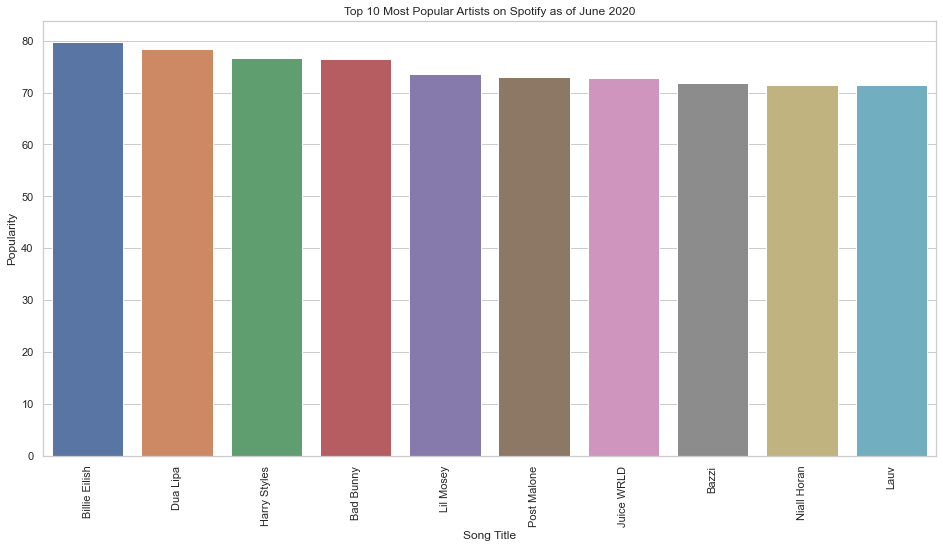

In [19]:
top10artist = nofeat.groupby('artists')['popularity'].mean().sort_values(ascending = False).head(10)
plt.figure(figsize=(16, 8))
ax = sns.barplot(top10artist.index, top10artist)
ax.set_title('Top 10 Most Popular Artists on Spotify as of June 2020')
ax.set_ylabel('Popularity')
ax.set_xlabel('Song Title')
plt.xticks(rotation = 90)

In [20]:
dataTypeSeries = df.dtypes
 
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Data type of each column of Dataframe :
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object


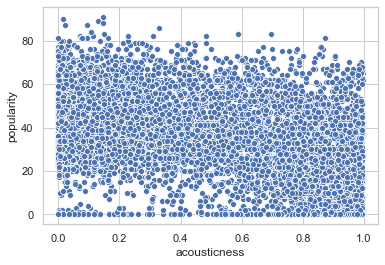

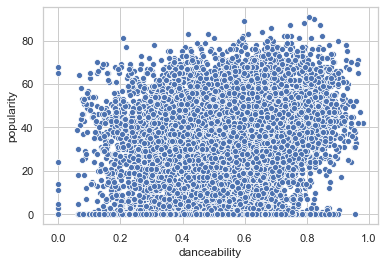

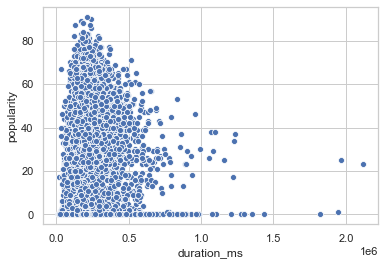

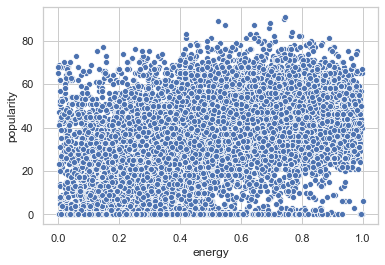

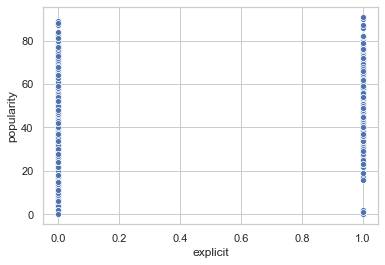

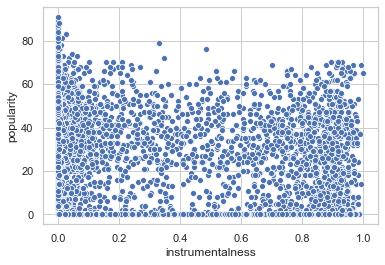

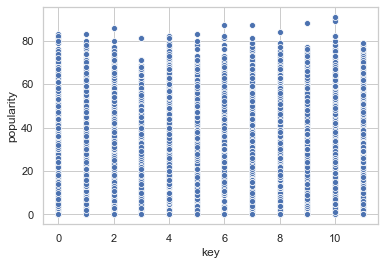

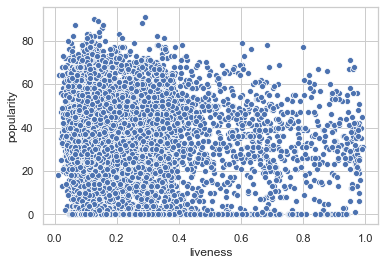

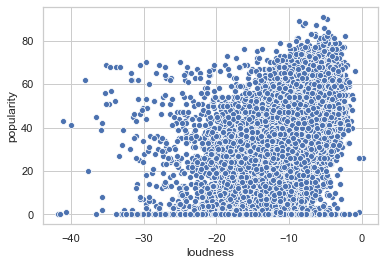

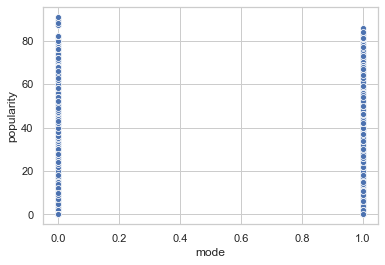

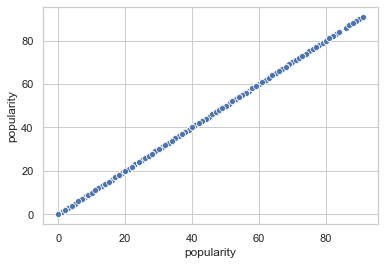

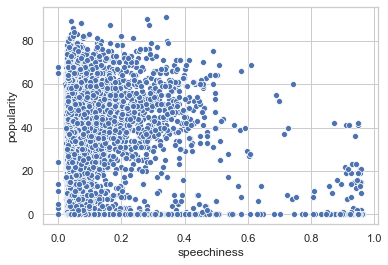

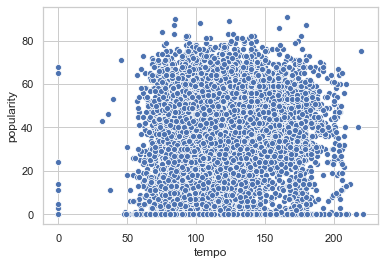

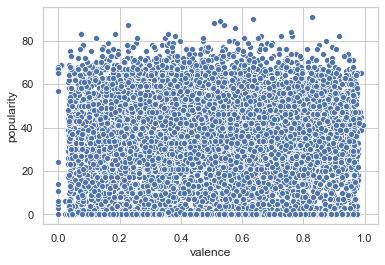

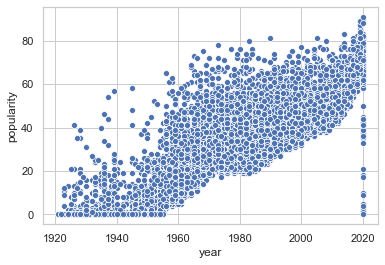

In [21]:
df_copy = df.copy()
df_copy = df_copy.sample(n=10000, random_state=42)
numeric = df_copy.select_dtypes([np.int, np.float])
numeric.drop(columns='popularity')
for i, col in enumerate(numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=col, y='popularity', data=df_copy)


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.252310,-0.108696,-0.766939,-0.242982,0.325992,-0.019063,0.020538,-0.594132,0.051348,-0.607545,-0.026618,-0.220203,-0.176809,-0.645299
danceability,-0.252310,1.000000,-0.138363,0.228030,0.199714,-0.276493,0.023017,-0.148998,0.296383,-0.046293,0.216073,0.209517,0.012534,0.571461,0.199895
duration_ms,-0.108696,-0.138363,1.000000,0.035017,-0.001123,0.080934,0.002186,0.006271,-0.016034,-0.048615,0.062577,-0.018279,-0.022879,-0.217146,0.066921
energy,-0.766939,0.228030,0.035017,1.000000,0.199043,-0.289413,0.025312,0.089613,0.784354,-0.045557,0.482030,0.038896,0.255891,0.346573,0.519078
explicit,-0.242982,0.199714,-0.001123,0.199043,1.000000,-0.125398,-0.001180,0.013467,0.212643,-0.084723,0.272390,0.272117,0.022725,-0.032660,0.313628
instrumentalness,0.325992,-0.276493,0.080934,-0.289413,-0.125398,1.000000,-0.010597,-0.035456,-0.421640,-0.038121,-0.307597,-0.096188,-0.103897,-0.192751,-0.304718
key,-0.019063,0.023017,0.002186,0.025312,-0.001180,-0.010597,1.000000,-0.012602,0.023478,-0.106492,0.009102,0.017936,-0.003386,0.015811,0.004247
liveness,0.020538,-0.148998,0.006271,0.089613,0.013467,-0.035456,-0.012602,1.000000,0.042669,-0.001870,-0.091589,0.120162,0.010775,-0.034724,-0.077405
loudness,-0.594132,0.296383,-0.016034,0.784354,0.212643,-0.421640,0.023478,0.042669,1.000000,-0.019502,0.450591,-0.022311,0.206197,0.309273,0.480535
mode,0.051348,-0.046293,-0.048615,-0.045557,-0.084723,-0.038121,-0.106492,-0.001870,-0.019502,1.000000,-0.049188,-0.056209,0.016571,0.025165,-0.048171


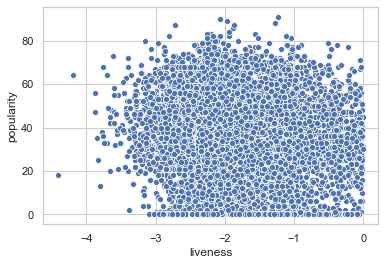

In [22]:
liveness_log = np.log(df_copy['liveness'])
sns.scatterplot(x=liveness_log, y='popularity', data=df_copy)
df_copy['liveness']=liveness_log
df_copy.corr()

In [23]:
baseline_df = df.select_dtypes(include=['int', 'float64'])
X = baseline_df.drop(columns='popularity')
y = baseline_df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
baseline_pred = regr.predict(X_train)

In [25]:
feats = ['acousticness', 'danceability', 'energy', 'explicit', 'instrumentalness', 'loudness','tempo','year']

In [26]:
X = df[feats]
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
baseline_pred = regr.predict(X_train)

In [28]:
rmse = np.sqrt(mean_squared_error(y_train, baseline_pred))
rmse

10.225499390169562

In [29]:
mean_absolute_error(y_train, baseline_pred)

7.79315444265936

In [30]:
test_pred = regr.predict(X_test)
test_pred

array([22.4848399 ,  2.46572189, 52.55441357, ..., 59.90679483,
       23.14097564, 29.30838472])

In [31]:
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
rmse

10.167420506664646

In [32]:
mean_absolute_error(y_test, test_pred)

7.739038302471627

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_train, baseline_pred)

0.7725835451012608

In [35]:
r2_score(y_test, test_pred)

0.7719641244435277

In [36]:
rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
rfg_pred = rfg.predict(X_test)
rmse = np.sqrt(mean_squared_error(rfg_pred, y_test))
rmse

9.140672419696726

In [38]:
r2_score(rfg_pred, y_test)

0.7804928828062909

In [39]:
mean_absolute_error(rfg_pred, y_test)

6.658272807493231

In [40]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [41]:
gbr_pred = gbr.predict(X_train)
rmse = np.sqrt(mean_squared_error(gbr_pred, y_train))
rmse

9.1551818639344

In [42]:
testpred_gbr = gbr.predict(X_test)
rmse = np.sqrt(mean_squared_error(testpred_gbr, y_test))
rmse

9.146313927896252

In [43]:
r2_score(testpred_gbr, y_test)

0.7747915116856644

In [44]:
r2_score(gbr_pred, y_train)

0.775263608764234

In [45]:
top10

name
Blinding Lights                                         100
death bed (coffee for your head) (feat. beabadoobee)     98
Toosie Slide                                             97
THE SCOTTS                                               97
The Box                                                  97
ROCKSTAR (feat. Roddy Ricch)                             96
Say So                                                   96
Supalonely                                               95
Dance Monkey                                             95
Sunday Best                                              94
Name: popularity, dtype: int64

In [46]:
top10list = top10artist.index.values.tolist()
top10list

['Billie Eilish',
 'Dua Lipa',
 'Harry Styles',
 'Bad Bunny',
 'Lil Mosey',
 'Post Malone',
 'Juice WRLD',
 'Bazzi',
 'Niall Horan',
 'Lauv']

In [47]:
spotify_tops = ['Drake', 'Ed Sheeran', 'Post Malone', 'Ariana Grande', 'Eminem', 'Rihanna',
               'Taylor Swift', 'Sia', 'Beyoncé', 'The Weeknd',]

In [48]:
for i in top10list:
    spotify_tops.append(i)

In [49]:
spotify_tops

['Drake',
 'Ed Sheeran',
 'Post Malone',
 'Ariana Grande',
 'Eminem',
 'Rihanna',
 'Taylor Swift',
 'Sia',
 'Beyoncé',
 'The Weeknd',
 'Billie Eilish',
 'Dua Lipa',
 'Harry Styles',
 'Bad Bunny',
 'Lil Mosey',
 'Post Malone',
 'Juice WRLD',
 'Bazzi',
 'Niall Horan',
 'Lauv']

In [50]:
new_df = df.copy()

In [51]:
feat = ['acousticness',
 'danceability',
 'energy',
 'explicit',
 'instrumentalness',
 'loudness',
 'tempo',
 'year',
 'artists']

In [52]:
new_df = new_df[feat]

In [53]:
feat

['acousticness',
 'danceability',
 'energy',
 'explicit',
 'instrumentalness',
 'loudness',
 'tempo',
 'year',
 'artists']

In [54]:
def drakeonehot(x):
    if 'Drake' in x:
        return 1
    else:
        return 0
    
def edonehot(x):
    if 'Ed Sheeran' in x:
        return 1
    else:
        return 0

def postonehot(x):
    if 'Post Malone' in x:
        return 1
    else:
        return 0
    
def arianaonehot(x):
    if 'Ariana Grande' in x:
        return 1
    else:
        return 0
    
def worstrapperofalltime(x):
    if 'Eminem' in x:
        return 1
    else:
        return 0

def rionehot(x):
    if 'Rihanna' in x:
        return 1
    else:
        return 0

def tsonehot(x):
    if 'Taylor Swift' in x:
        return 1
    else:
        return 0

def siaonehot(x):
    if 'Sia' in x:
        return 1
    else:
        return 0
    
def beyonehot(x):
    if 'Beyoncé' in x:
        return 1
    else:
        return 0
def wonehot(x):
    if 'The Weeknd' in x:
        return 1
    else:
        return 0
    
def billieonehot(x):
    if 'Billie Eilish' in x:
        return 1
    else:
        return 0
    
def duaonehot(x):
    if 'Dua Lipa' in x:
        return 1
    else:
        return 0
    
def haronehot(x):
    if 'Harry Styles' in x:
        return 1
    else:
        return 0
    
def bunonehot(x):
    if 'Bad Bunny' in x:
        return 1
    else:
        return 0

def lilonehot(x):
    if 'Lil Mosey' in x:
        return 1
    else:
        return 0

def juiceonehot(x):
    if 'Juice WRLD' in x:
        return 1
    else:
        return 0

In [55]:
new_df['drake'] = new_df['artists'].apply(drakeonehot)
new_df['ed'] = new_df['artists'].apply(edonehot)
new_df['post'] = new_df['artists'].apply(postonehot)
new_df['ariana'] = new_df['artists'].apply(arianaonehot)
new_df['eminem'] = new_df['artists'].apply(worstrapperofalltime)
new_df['riri'] = new_df['artists'].apply(rionehot)
new_df['taylor_swift'] = new_df['artists'].apply(tsonehot)
new_df['sia'] = new_df['artists'].apply(siaonehot)
new_df['bey'] = new_df['artists'].apply(beyonehot)
new_df['weeknd'] = new_df['artists'].apply(wonehot)
new_df['billie'] = new_df['artists'].apply(billieonehot)
new_df['dua_lipa'] = new_df['artists'].apply(duaonehot)
new_df['harry_styles'] = new_df['artists'].apply(haronehot)
new_df['bunny'] = new_df['artists'].apply(bunonehot)
new_df['juice'] = new_df['artists'].apply(juiceonehot)

In [56]:
new_df['popularity']= df['popularity']
new_df.corr()

,acousticness,danceability,energy,explicit,instrumentalness,loudness,tempo,year,drake,ed,post,ariana,eminem,riri,taylor_swift,sia,bey,weeknd,billie,dua_lipa,harry_styles,bunny,juice,popularity
acousticness,1.000000,-0.262832,-0.767022,-0.247950,0.339923,-0.585457,-0.210797,-0.642732,-0.024728,-0.005404,-0.009950,-0.015641,-0.039189,-0.023550,-0.029820,-0.013716,-0.021597,-0.018989,0.003395,-0.010389,-0.007146,-0.015663,-0.018274,-0.607992
danceability,-0.262832,1.000000,0.238806,0.218975,-0.283096,0.317951,0.003052,0.214770,0.028339,0.015735,0.011272,0.012083,0.046065,0.015960,0.012153,-0.000303,0.006911,0.006907,0.007995,0.009881,0.000312,0.031548,0.018169,0.229609
energy,-0.767022,0.238806,1.000000,0.200190,-0.303146,0.779194,0.253422,0.516668,0.008060,0.001910,0.009811,0.010401,0.039837,0.018465,0.019468,0.011477,0.010784,0.012829,-0.006771,0.008282,0.004316,0.015234,0.009411,0.480175
explicit,-0.247950,0.218975,0.200190,1.000000,-0.127075,0.219321,0.021392,0.324760,0.120027,0.000945,0.054704,0.024070,0.137930,0.038365,-0.008715,0.000550,0.012558,0.067378,-0.002852,0.003090,-0.003380,0.046740,0.071674,0.288192
instrumentalness,0.339923,-0.283096,-0.303146,-0.127075,1.000000,-0.439705,-0.113880,-0.298391,-0.016620,-0.012041,-0.009688,-0.012491,-0.021486,-0.013750,-0.018148,-0.003511,-0.013542,-0.015109,-0.003700,-0.005997,-0.005869,-0.012527,-0.010931,-0.306500
loudness,-0.585457,0.317951,0.779194,0.219321,-0.439705,1.000000,0.214425,0.465198,0.021913,0.013727,0.019478,0.022337,0.046331,0.026046,0.032387,0.015280,0.019180,0.021324,-0.000266,0.012501,0.010474,0.022996,0.017061,0.440732
tempo,-0.210797,0.003052,0.253422,0.021392,-0.113880,0.214425,1.000000,0.137090,0.002745,-0.009604,0.004208,-0.000865,-0.001348,0.003360,0.008134,0.006040,0.006065,0.007773,0.001684,-0.000229,-0.001000,0.002693,0.012344,0.133718
year,-0.642732,0.214770,0.516668,0.324760,-0.298391,0.465198,0.137090,1.000000,0.050512,0.032990,0.030363,0.035357,0.047919,0.035248,0.044908,0.020112,0.034033,0.044346,0.024843,0.017790,0.019491,0.037787,0.033650,0.875563
drake,-0.024728,0.028339,0.008060,0.120027,-0.016620,0.021913,0.002745,0.050512,1.000000,-0.001105,-0.000944,-0.001149,0.003659,0.030975,-0.001665,-0.000729,0.003244,0.014748,-0.000767,-0.000549,-0.000599,0.014377,-0.001024,0.052802
ed,-0.005404,0.015735,0.001910,0.000945,-0.012041,0.013727,-0.009604,0.032990,-0.001105,1.000000,-0.000431,-0.000525,0.011591,-0.000589,0.030495,-0.000333,0.009352,0.008192,-0.000350,-0.000251,-0.000274,-0.000525,-0.000467,0.036618


In [57]:
X = new_df[feat].drop(columns='artists')
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
gbr2 = GradientBoostingRegressor(random_state=42)
gbr2.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [59]:
gbr2_pred = gbr2.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, gbr2_pred))
rmse

9.1551818639344

In [60]:
r2_score(y_train, gbr2_pred)

0.8176999522059355

In [61]:
gbr2_testpred  = gbr2.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, gbr2_testpred))
rmse

9.146313927896252

In [62]:
r2_score(y_test, gbr2_testpred)

0.8154670972728172

In [63]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_train)
testpred = regr.predict(X_test)

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, testpred))
rmse

10.167420506664646

In [65]:
mean_absolute_error(y_test, testpred)

7.739038302471627

In [66]:
r2_score(y_test, testpred)

0.7719641244435277

In [67]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [68]:
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
rfg_pred = rfg.predict(X_train)

In [69]:
rfg_pred = rfg.predict(X_test)

In [70]:
rmse = np.sqrt(mean_squared_error(rfg_pred, y_test))
rmse

9.144781009485719

In [71]:
r2_score(rfg_pred, y_test)

0.7802485509064453

In [72]:
mean_absolute_error(rfg_pred, y_test)

6.6540891299593

In [73]:
df_copy
cvX = df_copy[feat].drop(columns=['artists'])
cvy = df_copy['popularity']

In [74]:
# rf_random = RandomizedSearchCV(estimator = cv_rfg, param_distributions = random_grid, 
#                                n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(cvX, cvy)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=Fals...
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [75]:
# rf_random.best_params_

In [76]:
cv_rfg = RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=4, max_features='auto',
                              max_depth=10,bootstrap=True)
cv_rfg.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200)

In [77]:
cvrfg_pred = cv_rfg.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, cvrfg_pred))
rmse

8.700106557219566

In [78]:
cvrfg_testpred = cv_rfg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, cvrfg_testpred))
rmse

9.018003647932911

In [79]:
r2_score(y_test, cvrfg_testpred)

0.820608269408657

In [80]:
mean_absolute_error(y_test, cvrfg_testpred)

6.544282759013851

In [81]:
rmse = np.sqrt(mean_squared_error(y_train, cvrfg_pred))
rmse

8.700106557219566

In [82]:
mean_absolute_error(y_train, cvrfg_pred)

6.322131523950451

In [83]:
r2_score(y_train, cvrfg_pred)

0.8353726548919862

In [84]:
rfg_testpred = rfg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, rfg_testpred))
rmse

9.144781009485719

In [85]:
r2_score(y_test, rfg_testpred)

0.8155289473648644

In [86]:
mean_absolute_error(y_test, rfg_testpred)

6.6540891299593

In [87]:
rfr = RandomForestRegressor(max_depth=3, n_estimators=100)   

In [88]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=3)

In [89]:
rfr_pred = rfr.predict(X_train)
rfr_testpred = rfr.predict(X_test)

In [90]:
rmse = np.sqrt(mean_squared_error(y_train, rfr_pred))
rmse

9.589783317282533

In [91]:
rmse = np.sqrt(mean_squared_error(y_test, rfr_testpred))
rmse

9.543253303906303

In [92]:
r2_score(y_test, rfr_testpred)

0.7991025108490755

In [93]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dtr = DecisionTreeRegressor(random_state=42)

In [95]:
dtr = dtr.fit(X_train,y_train)
dtr_pred = dtr.predict(X_train)

In [96]:
rmse = np.sqrt(mean_squared_error(y_train, dtr_pred))
rmse

0.9384362934757714

In [97]:
dtr_testpred = dtr.predict(X_test)

In [98]:
rmse = np.sqrt(mean_squared_error(y_test, dtr_testpred))
rmse

12.929574515888355

In [99]:
r2_score(y_test, dtr_testpred)

0.6312346788276999

In [100]:
import joblib

In [101]:
joblib.dump(regr, 'base_model')

['base_model']

In [102]:
mj = joblib.load('base_model')

In [103]:
mj.coef_

array([-4.54509361,  3.45192941, -2.70925389, -0.39805038, -2.03140991,
        0.06387614,  0.00494263,  0.69129157])

In [104]:
mj.predict([[.99,.99,.99,.21,.31,.41,2,2000]])

array([45.1018597])